In [1]:
import numpy as np # linear algebra

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv("D:\Crack\Book_rating.csv")
books = pd.read_csv("D:\Books_data.csv")
print(ratings.shape)
print(books.shape)

(518659, 10)
(212404, 10)


In [4]:
ratings.head(1)

,Id,Title,Price,User_id,profileName,review_helpfulness,review_score,review_time,review_summary,review_text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...


In [5]:
books.head(1)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN


# **Data Pre-Processing**

In [6]:
# Merging both the dataset 
data = pd.merge(ratings,books, on = 'Title')
data.shape

(518659, 19)

In [7]:
#extracting usefull columns for our analysis
data = data[['Title','review_score','review_text','authors','categories','ratingsCount']]

In [8]:
# Dropping Duplicates
data.drop_duplicates(inplace = True)
data.shape

(501079, 6)

In [9]:
data.isna().sum()

Title               31
review_score         0
review_text          0
authors          66444
categories       92100
ratingsCount    232543
dtype: int64

In [10]:
# Dropping Null Values
data.dropna(inplace = True)
data.isna().sum()

Title           0
review_score    0
review_text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254328 entries, 4 to 518656
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Title         254328 non-null  object 
 1   review_score  254328 non-null  int64  
 2   review_text   254328 non-null  object 
 3   authors       254328 non-null  object 
 4   categories    254328 non-null  object 
 5   ratingsCount  254328 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 13.6+ MB


In [12]:
data.head(1)

,Title,review_score,review_text,authors,categories,ratingsCount
4,The Church of Christ: A Biblical Ecclesiology ...,4,This book is a continual resource. It is so bi...,['Everett Ferguson'],['Religion'],5.0


In [13]:
# Using only the fraction of dataset to reduce the running time on big data
data = data.sample(50000)
data.shape

(50000, 6)

In [14]:
# Removes bractes and colons from authors name
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')
# Counting the length of the each review
data['word_count'] = data['review_text'].apply(lambda x: len(x.split(' ')))

data.head()

,Title,review_score,review_text,authors,categories,ratingsCount,word_count
448493,"Little women;: Or, Meg, Jo, Beth, and Amy",4,Little Women was a significantly written book ...,Rey Terciero,Juvenile Fiction,6.0,277
345390,The Economy of God,5,"My copy of ""The Economy of God"" got to me prom...",Witness Lee,Religion,3.0,34
394924,The Pact: A Love Story,5,Was a great story that I couldn't stop listeni...,Jodi Picoult,Fiction,127.0,25
201889,shadow castle,5,"When I was around 9 years old, I found my fath...",Marian Cockrell,Juvenile Fiction,1.0,53
207545,Prosperity,5,This book speak the truth of truth's! A person...,Edwene Gaines,Self-Help,4.0,43


# **EDA**

# Most number of books in each genres

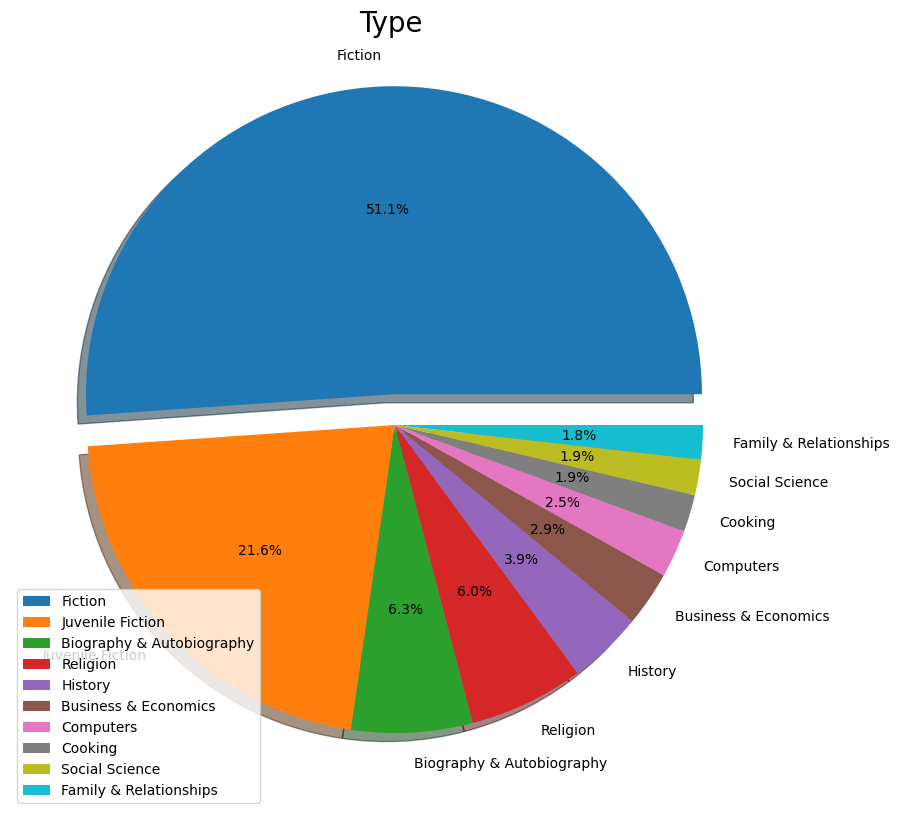

In [15]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Type ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

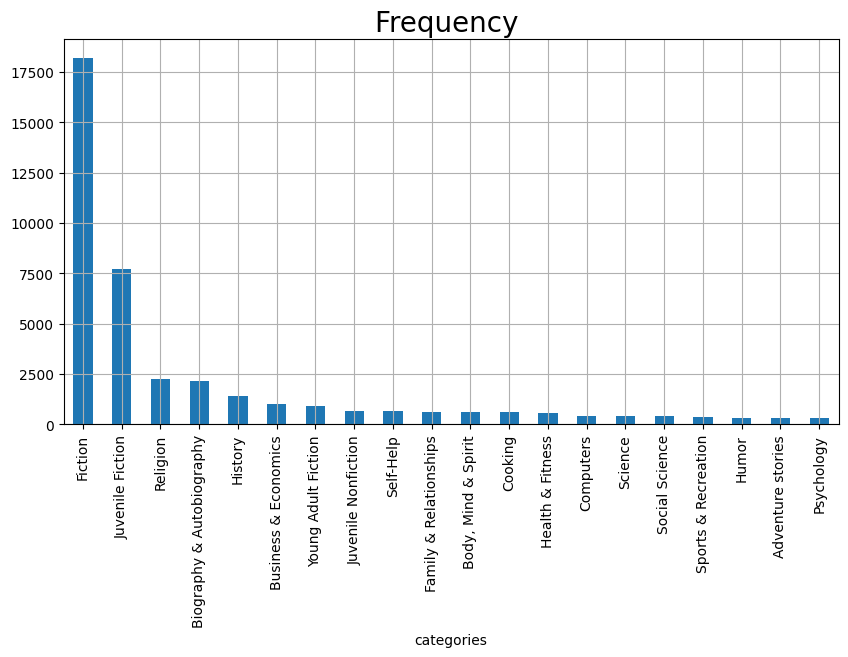

In [16]:
data['categories'].value_counts().head(20).sort_values(ascending = False).plot(kind='bar', figsize=(10,5))
plt.title('Frequency ', fontsize = 20)
plt.grid()
plt.show()

# Most frequent Words in over 3 rated Reiews

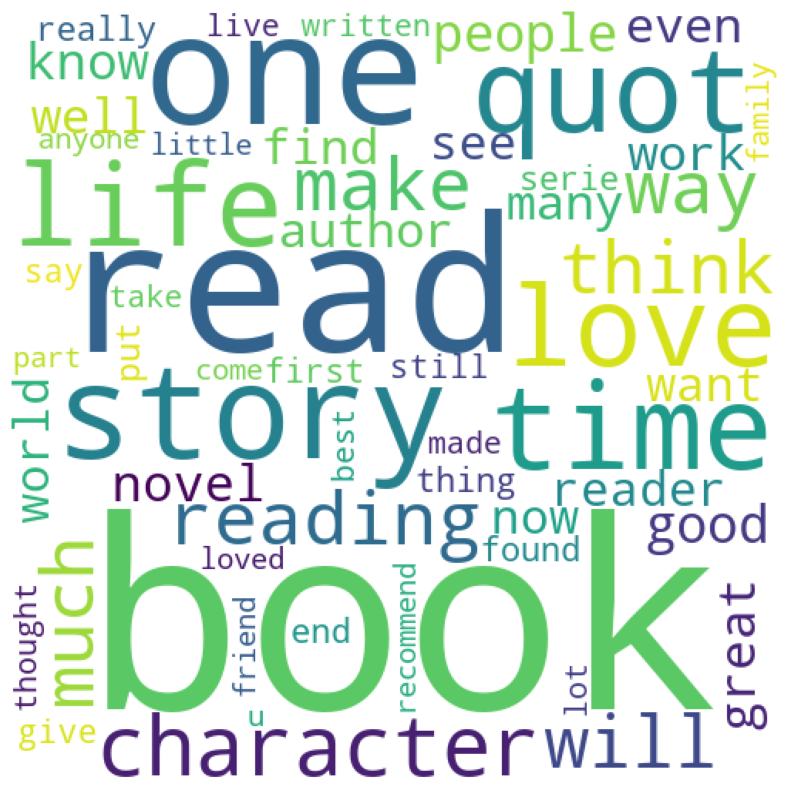

In [18]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review_score'] > 3]['review_text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

# Most frequent Words in less than 2 rated Reiews

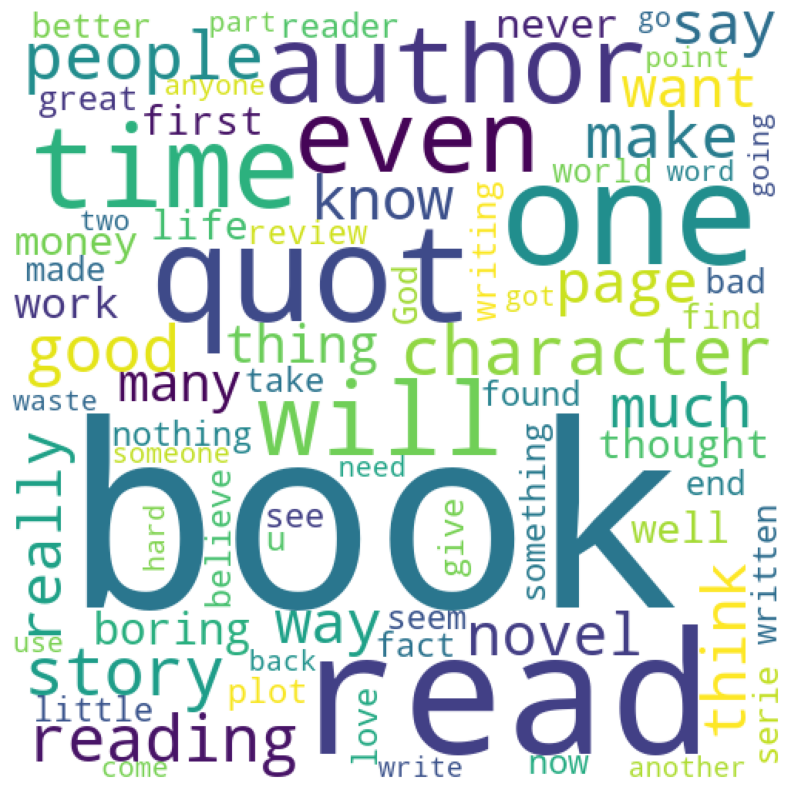

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review_score'] < 2]['review_text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

# Most Reviewed Books

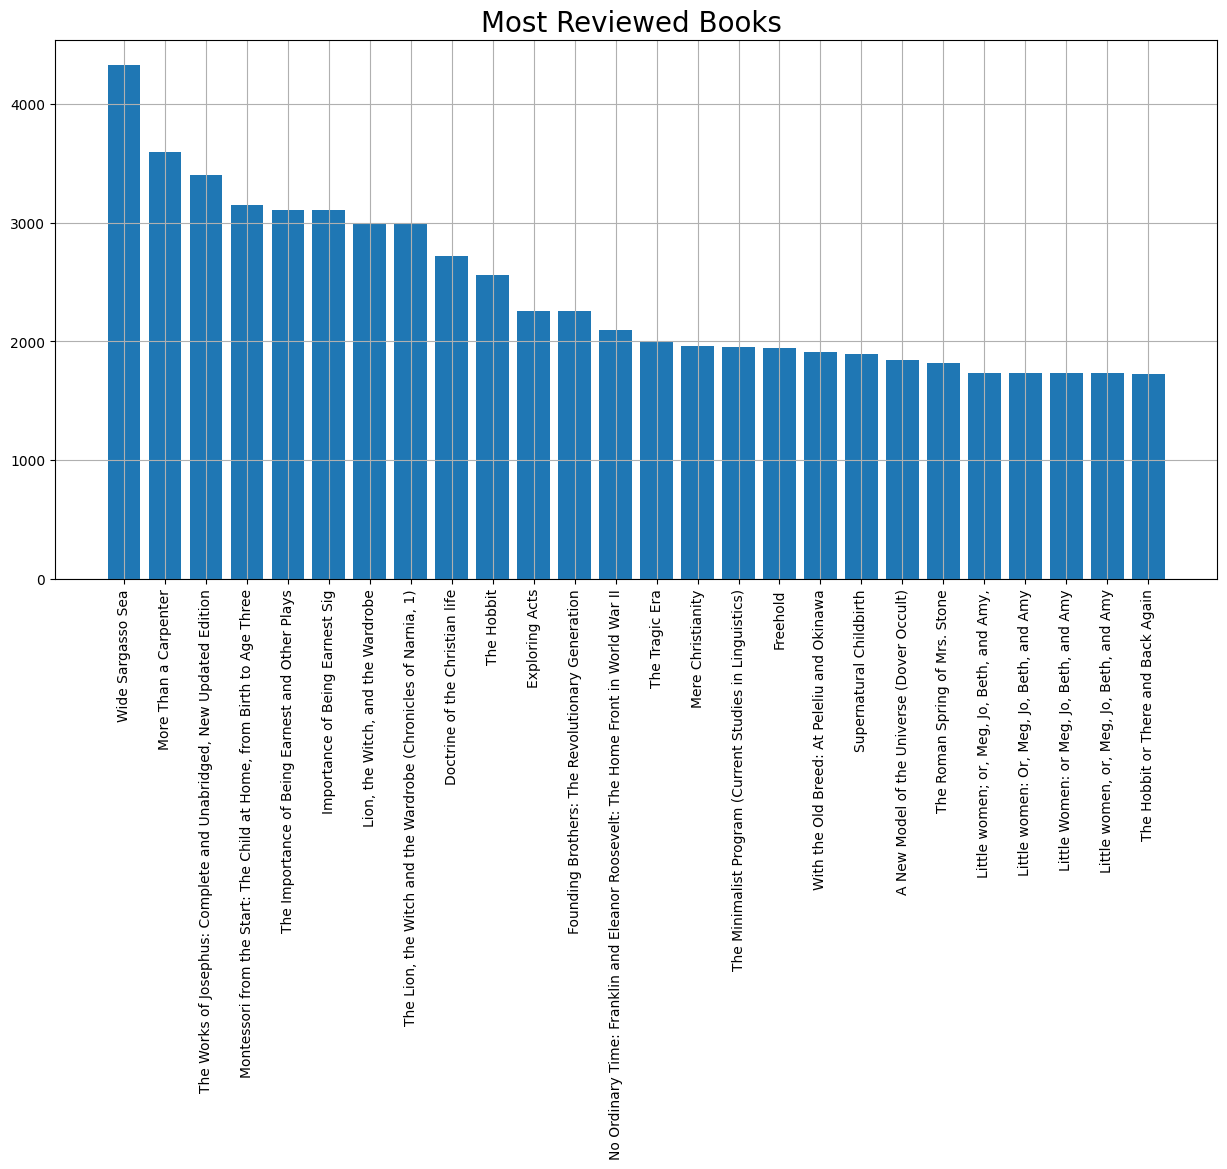

In [20]:
plt.figure(figsize = (15,7))
cou = data[data['word_count'] > 1707][['Title','word_count']].sort_values(ascending = False, by = 'word_count')
plt.bar(cou['Title'], cou['word_count'])
plt.title('Most Reviewed Books ', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# Higest Rated Books with over 3000 ratings each Book

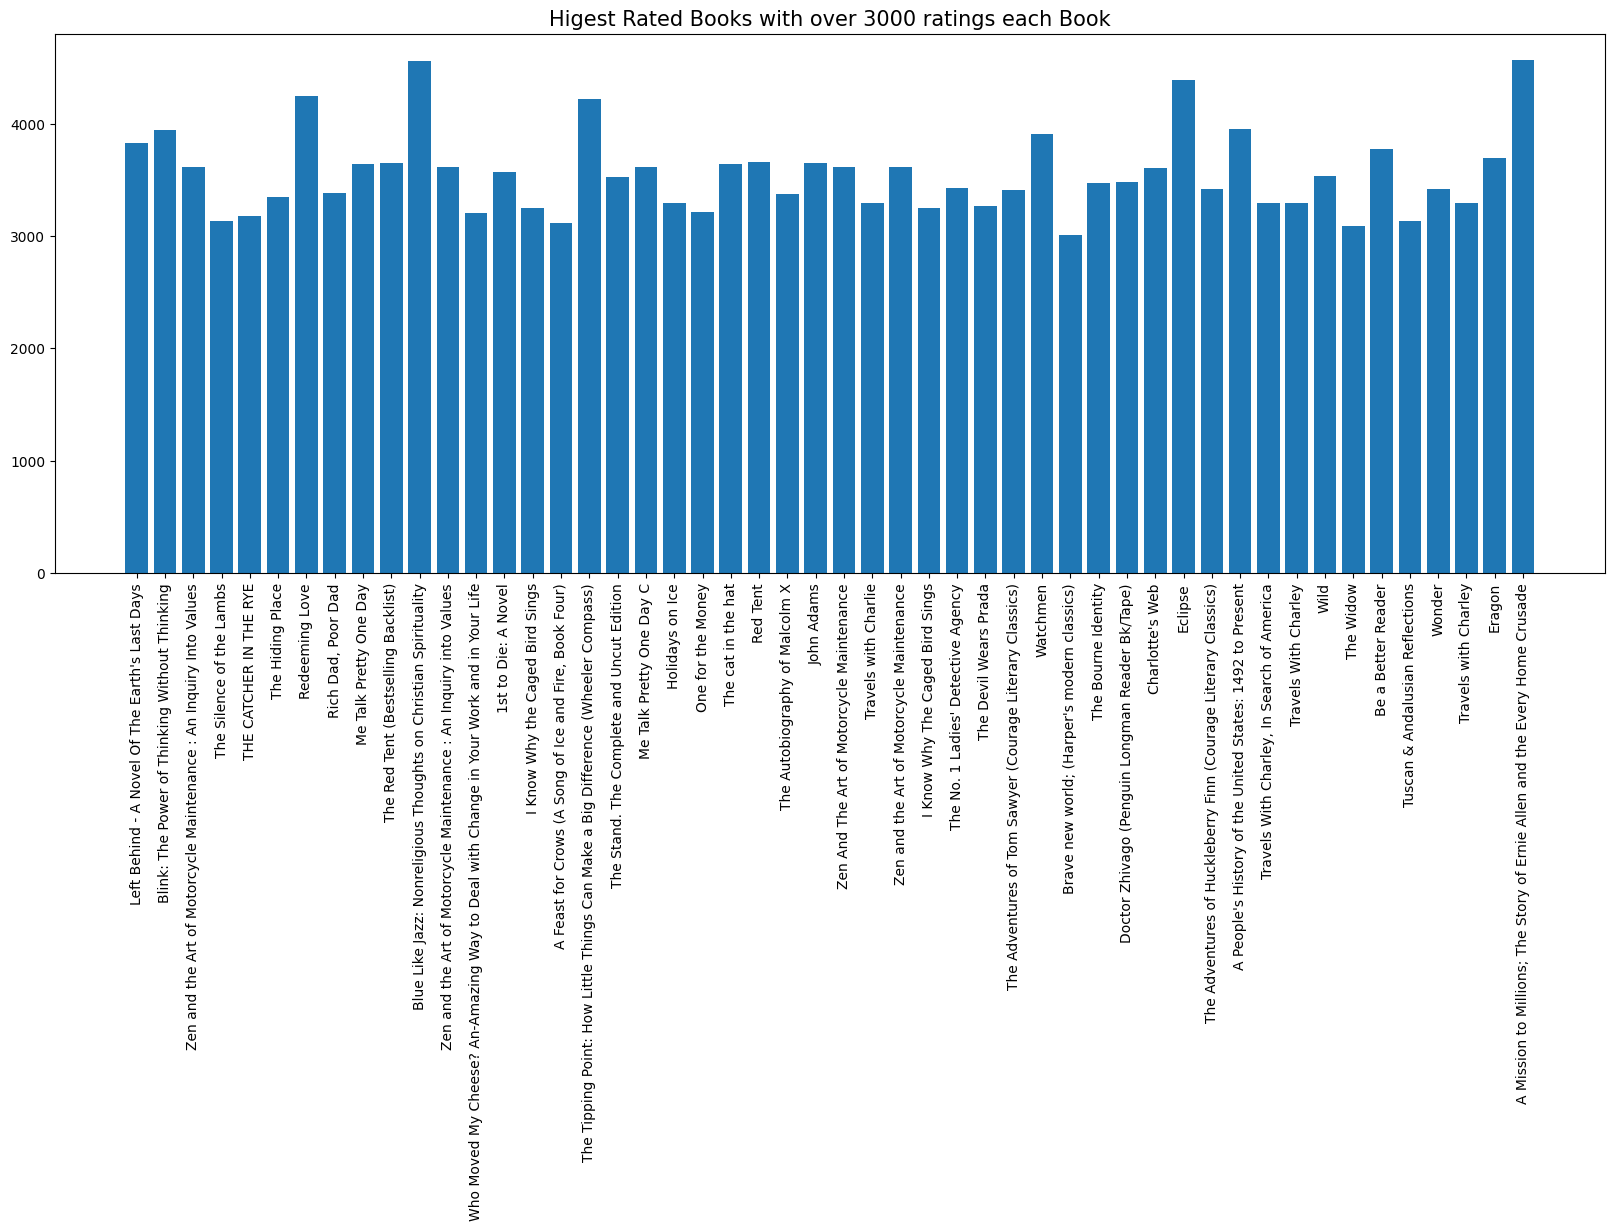

In [21]:
plt.figure(figsize = (20, 7))
rating_counts = data[data['ratingsCount'] > 3000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 3000 ratings each Book', fontsize = 15)
plt.xticks(rotation  = 'vertical')
plt.show()

# Number of Books written by the Authors

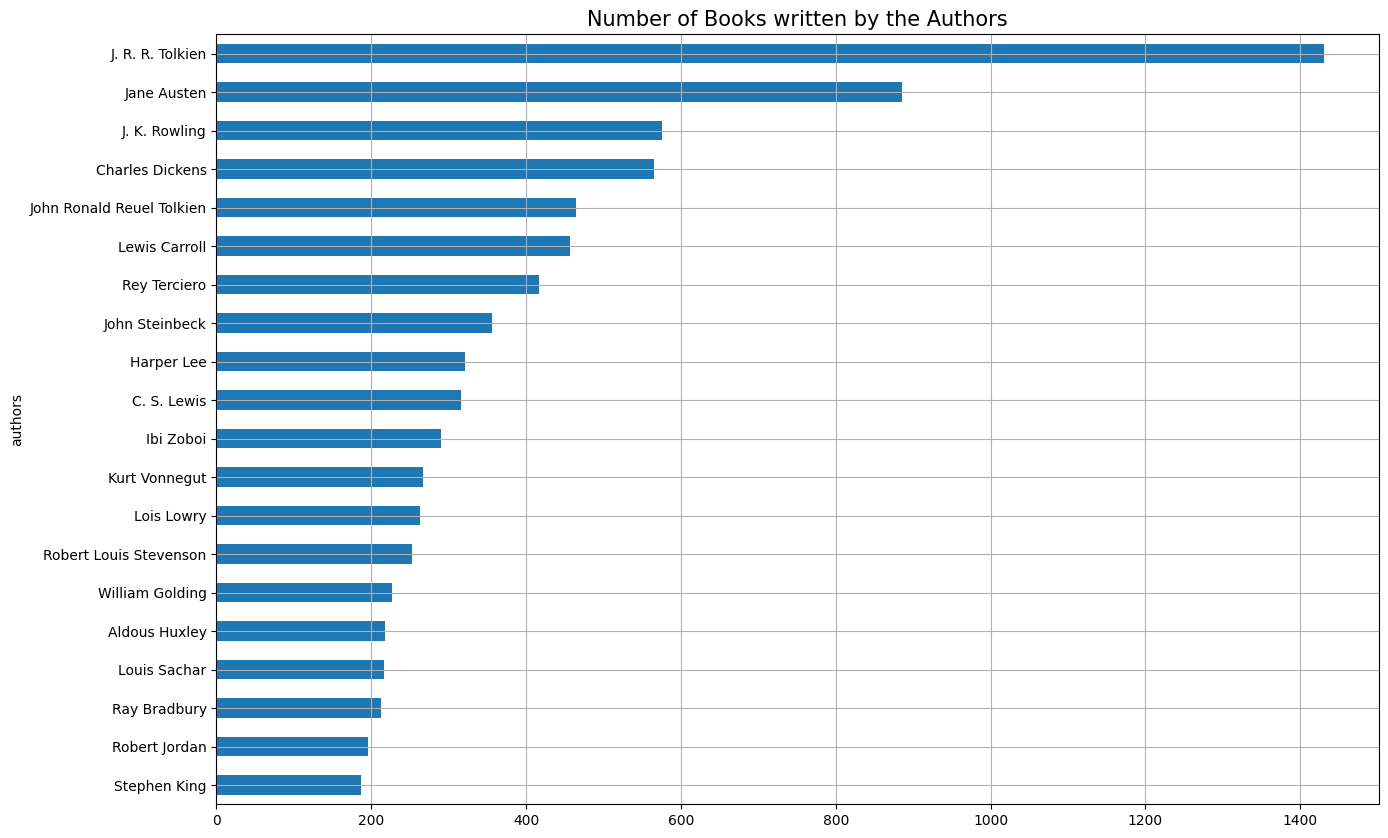

In [26]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

# **Sentiment Analysis**

In [27]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
     --------- --------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
     --------- --------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/126.0 kB 131.3 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/126.0 kB 131.3 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 182.2 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 182.2 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 182.2 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 182.2 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 182.2 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0

In [28]:
# Library for sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [30]:
# Lower casing the reviews
data['clean_reviews'] = data['review_text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [31]:
data.head(2)

,Title,review_score,review_text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound
448493,"Little women;: Or, Meg, Jo, Beth, and Amy",4,Little Women was a significantly written book ...,Rey Terciero,Juvenile Fiction,6.0,277,little women was a significantly written book ...,"{'neg': 0.086, 'neu': 0.675, 'pos': 0.239, 'co...",0.9928
345390,The Economy of God,5,"My copy of ""The Economy of God"" got to me prom...",Witness Lee,Religion,3.0,34,"my copy of ""the economy of god"" got to me prom...","{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.8207


In [32]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review_score,review_text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
448493,"Little women;: Or, Meg, Jo, Beth, and Amy",4,Little Women was a significantly written book ...,Rey Terciero,Juvenile Fiction,6.0,277,little women was a significantly written book ...,"{'neg': 0.086, 'neu': 0.675, 'pos': 0.239, 'co...",0.9928,positive
345390,The Economy of God,5,"My copy of ""The Economy of God"" got to me prom...",Witness Lee,Religion,3.0,34,"my copy of ""the economy of god"" got to me prom...","{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.8207,positive
394924,The Pact: A Love Story,5,Was a great story that I couldn't stop listeni...,Jodi Picoult,Fiction,127.0,25,was a great story that i couldn't stop listeni...,"{'neg': 0.089, 'neu': 0.572, 'pos': 0.34, 'com...",0.8311,positive
201889,shadow castle,5,"When I was around 9 years old, I found my fath...",Marian Cockrell,Juvenile Fiction,1.0,53,"when i was around 9 years old, i found my fath...","{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.9053,positive
207545,Prosperity,5,This book speak the truth of truth's! A person...,Edwene Gaines,Self-Help,4.0,43,this book speak the truth of truth's! a person...,"{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'comp...",0.7950,positive


# Distribution of Negative, Neutral and Positive Sentiment in whole corpus

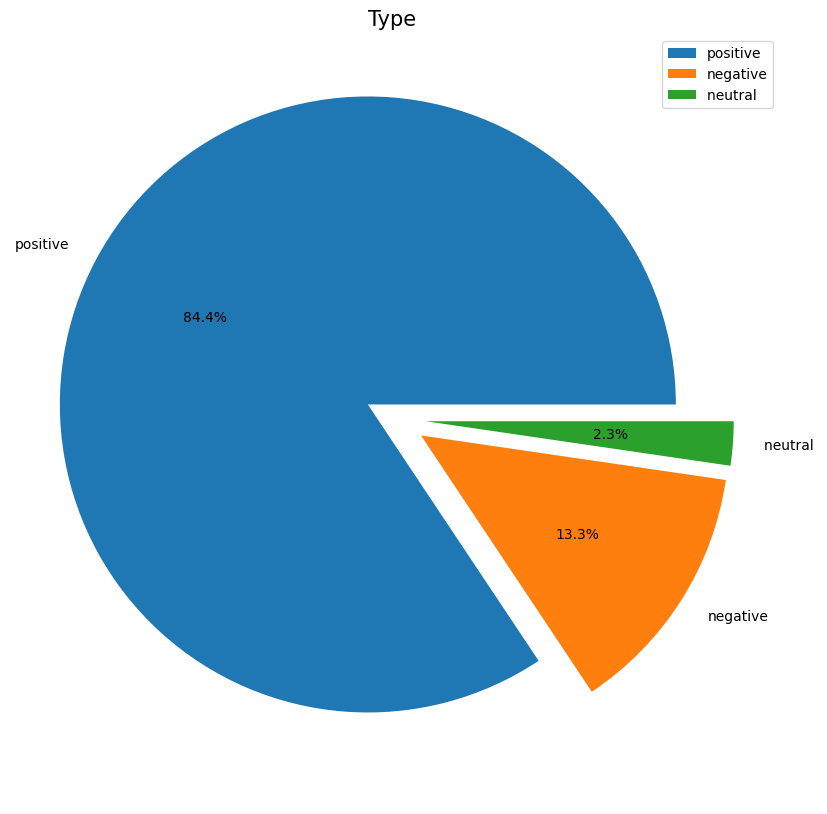

In [33]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['positive','negative','neutral ']
plt.pie(data['Sentiment'].value_counts(),explode =(0.1,0.1,0.1), labels=labels,autopct='%1.1f%%')
plt.title('Type ', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

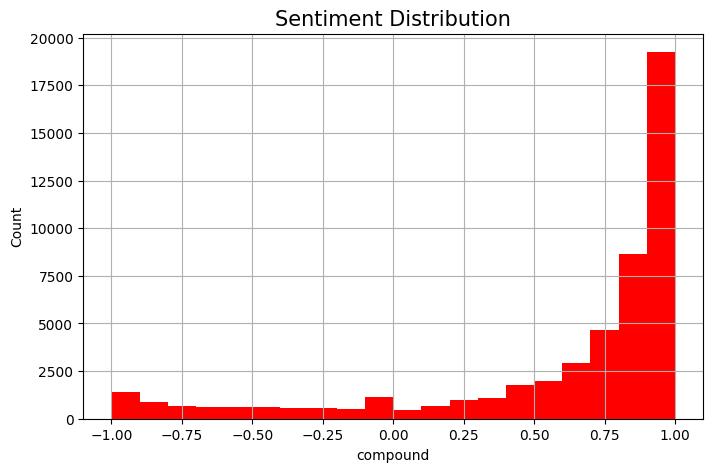

In [34]:
plt.figure(figsize = (8,5))
plt.hist(data['compound'],bins = 20,color = 'red')
plt.title('Sentiment Distribution',fontsize = 15)
plt.xlabel('compound')
plt.ylabel('Count')
plt.grid()
plt.show()

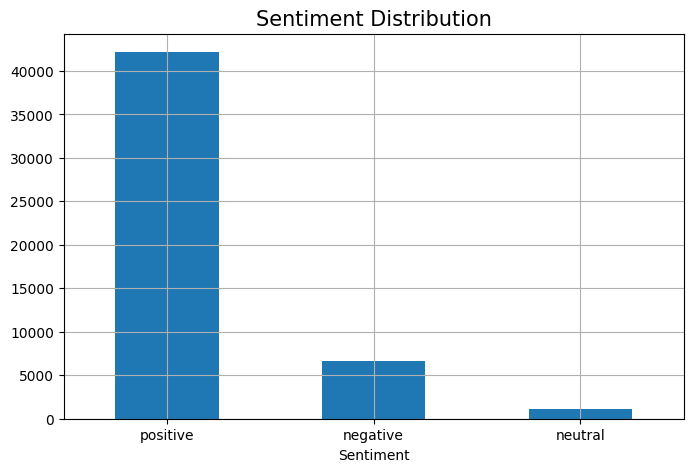

In [35]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

# Most number of **Positive** Reviews on the Books

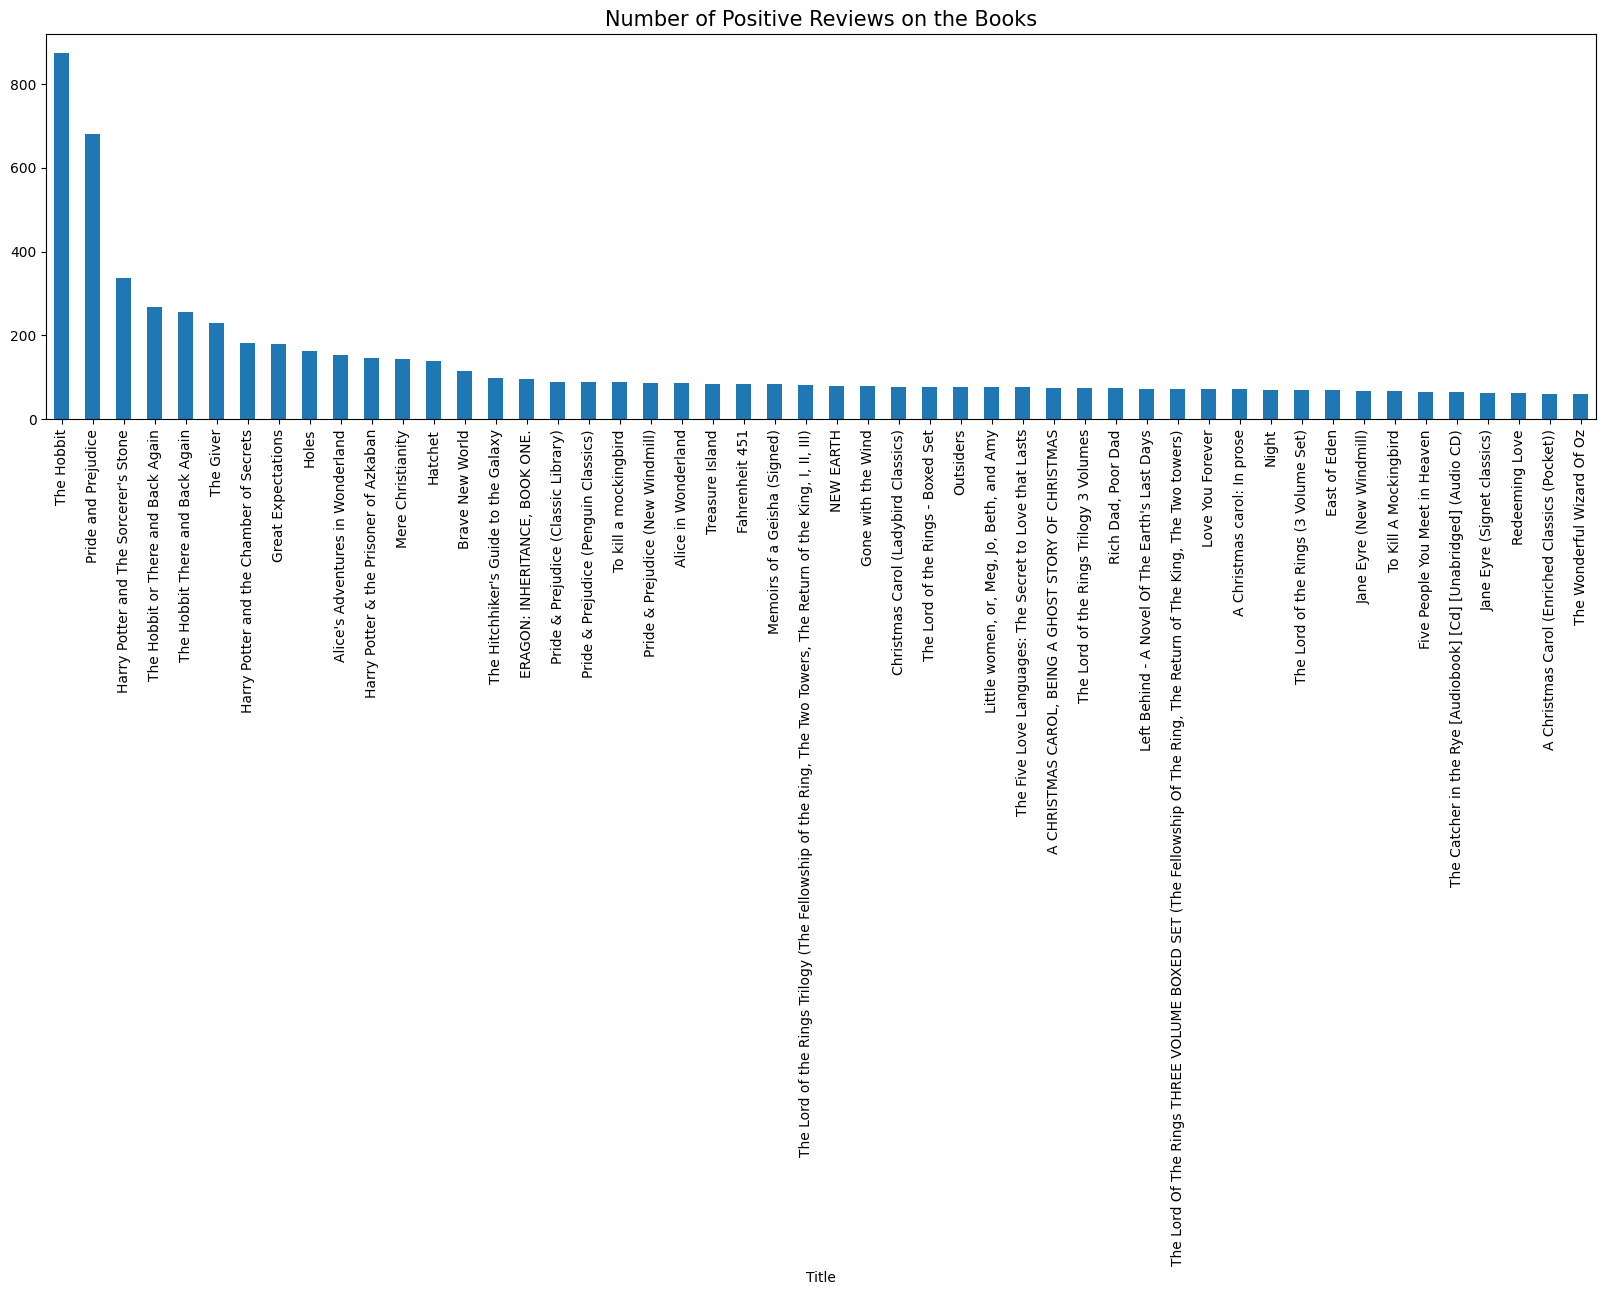

In [36]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Most number of **Neutral** Reviews on the Books

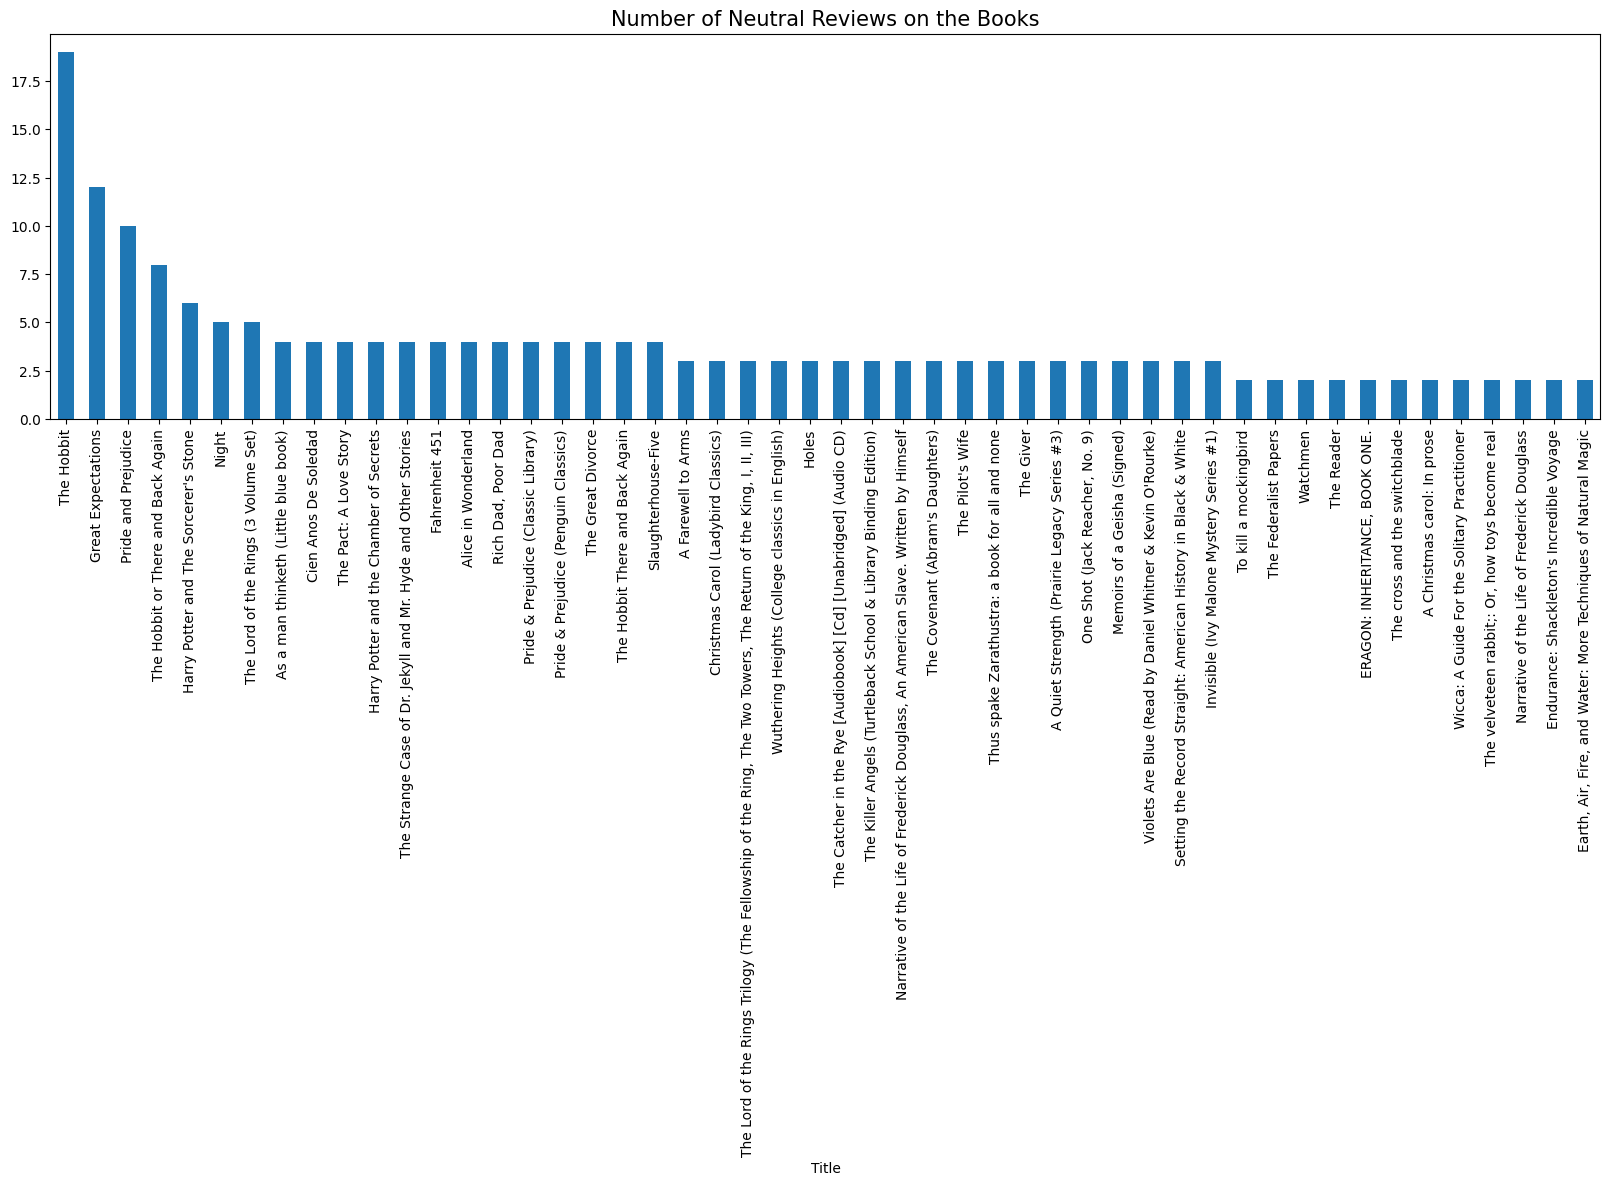

In [37]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Most number of **Negative** Reviews on the Books

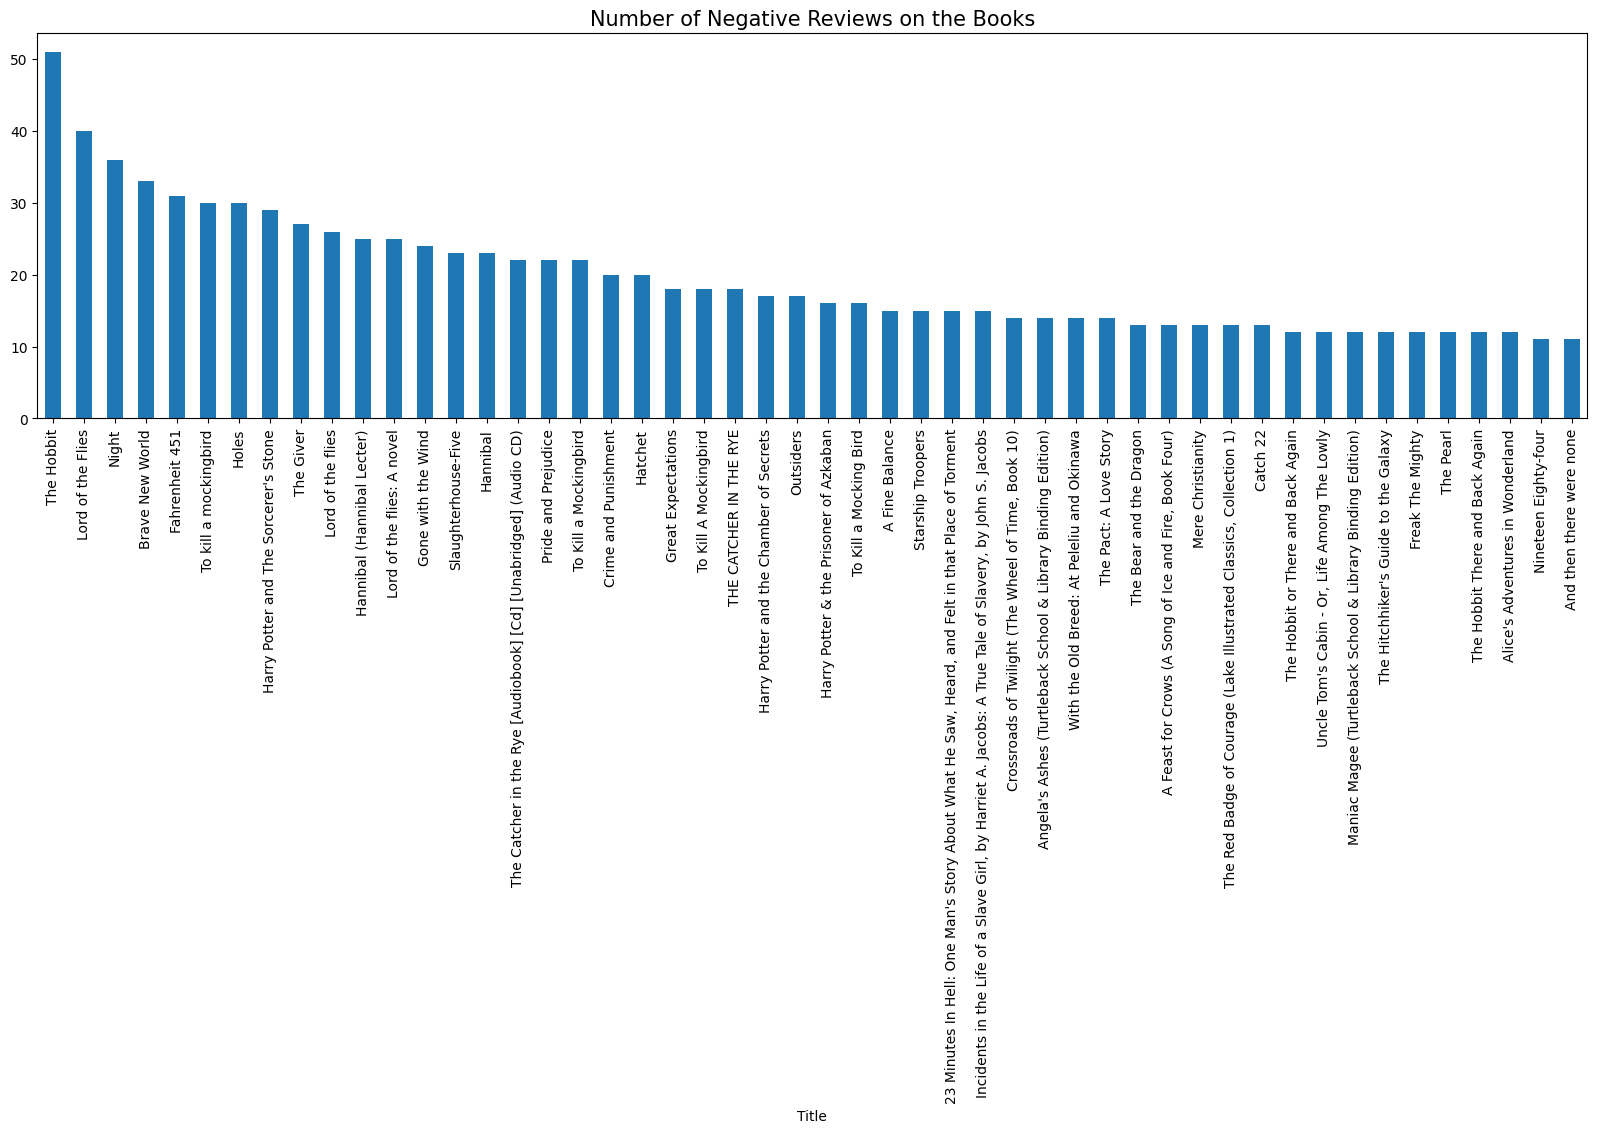

In [38]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (20,5))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# ****Thank You!!****